# Monte Carlo Simulation on Randomized Grid Search
To verify rule of thumbs from https://towardsdatascience.com/hyper-parameter-tuning-with-randomised-grid-search-54f865d27926  

<i>With 60 iterations, 95% of the time, best 5% sets of parameters can be found, regardless of grid size.</i>

 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm_notebook as tqdm 

plt.style.use('ggplot')

In [2]:
def search_top5_parameters(data_size, n_picks_per_iteration='auto'):
    ###############################################################
    # Create a dataframe with two columns
    # data: int sequence from 0 to n-1 
    # top5_pct: bool sequence with length, only 5% of them is True
    #           True indicates top 5 percent data
    # tried: bool sequence with length n
    #        True indicates the data was tried in early iteration
    ##############################################################
    top_5 = np.random.choice(range(data_size), 5, False)
    df = pd.DataFrame({
                        'params_index': list(range(data_size)), 
                        'top5_pct': [False]*data_size,
                        'tried': [False]*data_size
                       })
    df.loc[top_5, 'top5_pct']=True
    
    ###############################
    # Search for top 5 parameters
    # Return number of trials
    ###############################
    num_trials = 1
    if n_picks_per_iteration == 'auto':
        n_picks = int(data_size * 0.05)
    else:
        n_picks = int(n_picks_per_iteration)
    
    while(True):
        untried_numbers = df.query("tried==False")['params_index']
        picked_number = np.random.choice(untried_numbers, n_picks)
        df.loc[picked_number, 'tried'] = True
        
        if bool(set(top_5).intersection(set(picked_number))):
            return num_trials
            
        num_trials += 1
        
    return None

def simulation(num_trials, data_size, n_picks_per_iteration):
    data = [search_top5_parameters(data_size, n_picks_per_iteration) for i in tqdm(range(num_trials))]
    
    fig, ax = plt.subplots(figsize=(15, 6))

    pd.Series(data).plot.hist(ax=ax, alpha=0.8)
    ax.set_ylabel('Count')
    ax.set_xlabel('Iteration required to find top 5% parameters')
    ax.set_title("Simulation of top 5% parameters search with {} trials for {} parameter sets".format(num_trials, data_size))
    
    plt.show()

# Simulation (Each iteration picks just 1 parameter randomly)

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

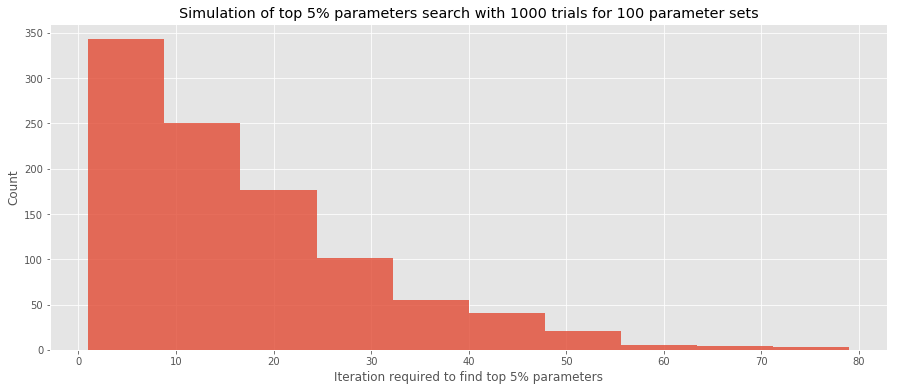

In [3]:
simulation(1000, 100, 1)

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

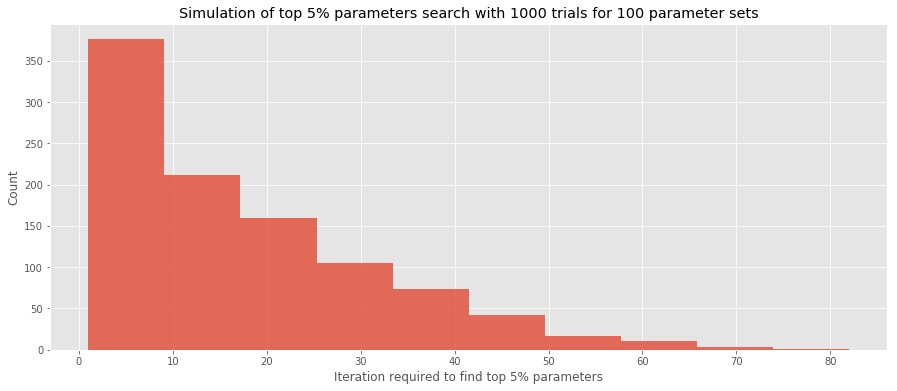

In [4]:
simulation(1000, 100, 1)

# Simulation (Each iteration picks just 5% x Datasize parameter randomly)

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

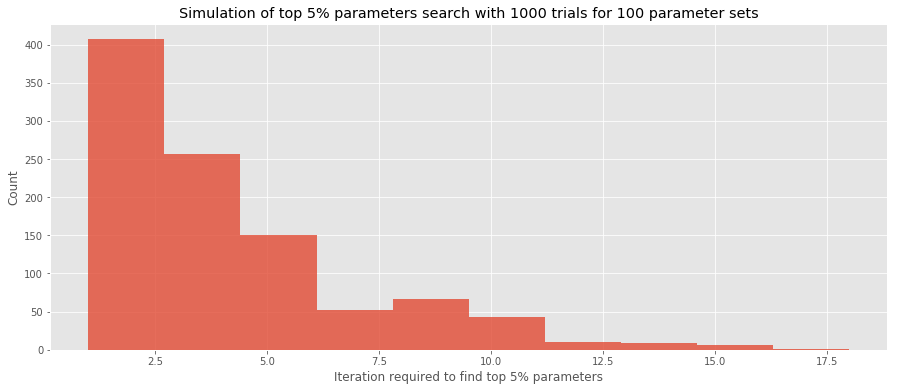

In [6]:
simulation(1000, 100, 'auto')

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

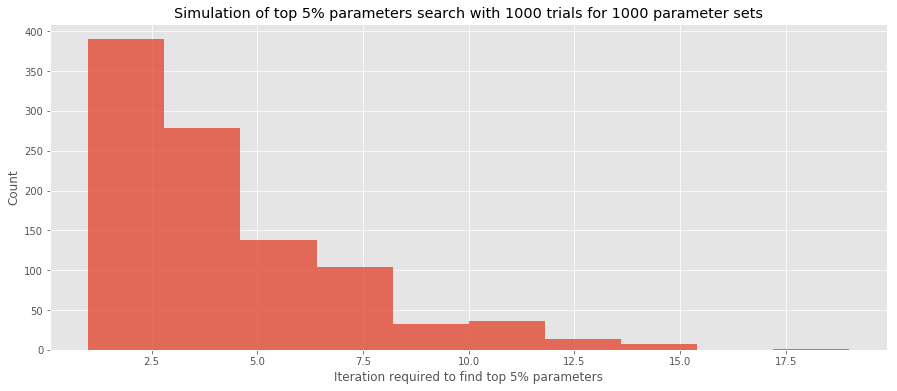

In [7]:
simulation(1000, 1000, 'auto')